# Weekly exercise: Convolutional Neural Network

IN5400 / IN9400 MACHINE LEARNING FOR IMAGE ANALYSIS

---

<a id='Task1'></a>
### Task1: Calculate the theoretical receptive field
---

You shall implement the function "receptive_field" and use it to calculate the receptive field for 5 different convolutional neural network architectures. When evaluating the receptive field, the image size (resolution) and the size of the objects of interest is important to consider.


- Receptive field: 𝑅 
- Filter size: 𝐹
- Stride: S
- Layer index: 𝑘
- $ R^{0}=1 $ Receptive field of input data 

<b>Note:</b> Superscript indicate layer index not exponent

Equation (1)

 $$R^k = R^{k-1} + \bigg[ (F^k -1)\cdot \prod_{i=1}^{k-1} S^i      \bigg] $$
 

---

<img src="images/receptive_field2.png" alt="Drawing" style="width: 600px;"/>





In [5]:
def receptive_field(f, s):
    # Implement equation(1)
    
    # Inputs:
    # f (list): Filter size for each layer
    # s (list): Stride for each layer
    
    # Output
    # R: The calculated receptive field for each layer as a numpy array
    
    # ToDo: 
    R = [1]
    for kk in range(len(s)):
        S = 1
        for ii in range(kk):
            S = S * s[ii]
        fov = R[-1] + (f[kk] - 1) * S
        R.append(fov)
    return np.array(R)

In [9]:
# Defining the architectures

# Architecture1
A1_filterSize = [3, 3, 3, 3, 3, 3]
A1_stride     = [1, 1, 1, 1, 1, 1]
A1_Recept     = receptive_field(A1_filterSize, A1_stride)

# Architecture2
A2_filterSize = [3, 3, 3, 3, 3, 3]
A2_stride     = [2, 1, 2, 1, 2, 1]
A2_Recept     = receptive_field(A2_filterSize, A2_stride)

# Architecture3
A3_filterSize = [3, 3, 3, 3, 3, 3]
A3_stride     = [2, 2, 2, 2, 2, 2]
A3_Recept     = receptive_field(A3_filterSize, A3_stride)

# Architecture4
A4_filterSize = [5, 5, 5, 5, 5, 5]
A4_stride     = [1, 1, 1, 1, 1, 1]
A4_Recept     = receptive_field(A4_filterSize, A4_stride)

# Architecture5
A5_filterSize = [5, 5, 5, 5, 5, 5]
A5_stride     = [2, 1, 2, 1, 2, 1]
A5_Recept     = receptive_field(A5_filterSize, A5_stride)


[  1   3   7  15  31  63 127]


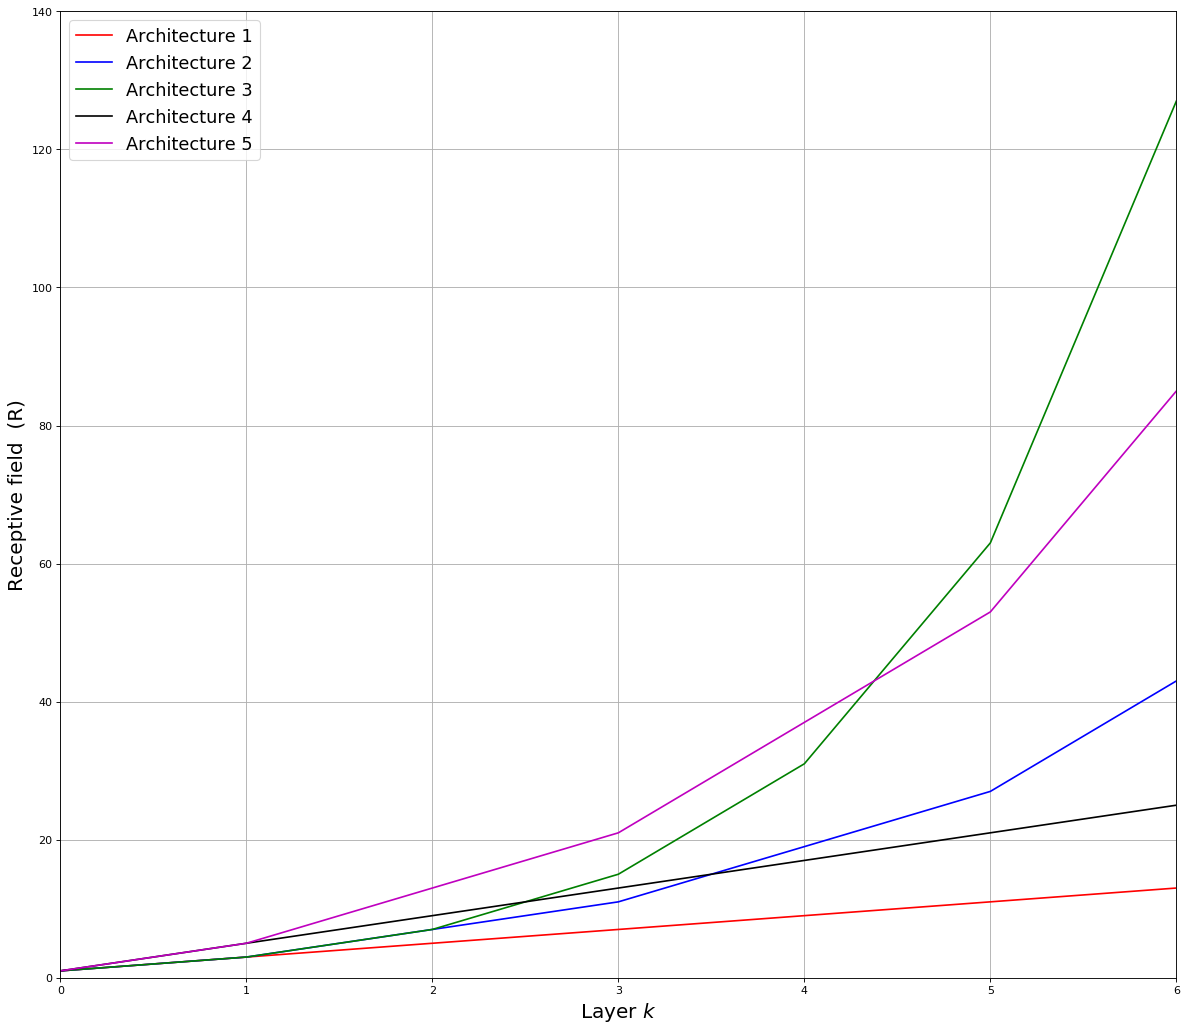

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(1, 1, 1)
plt.plot(A1_Recept, 'r', label='Architecture 1')
plt.plot(A2_Recept, 'b', label='Architecture 2')
plt.plot(A3_Recept, 'g', label='Architecture 3')
plt.plot(A4_Recept, 'k', label='Architecture 4')
plt.plot(A5_Recept, 'm', label='Architecture 5')
plt.ylabel('Receptive field  (R)', fontsize=18)
plt.xlabel('Layer $k$', fontsize=18)
ax.grid()
plt.ylim([0, 140])
plt.xlim([0, 6])
ax.legend(loc='upper left', fontsize=16)

---

### Task2: Convolution

---

You are given an input image (x), kernel (w) and bias (b). Your task is to evaluate
the shaded pixel in the image after the convolution. The origin of the
kernel is the shaded pixel. 



<img src="images/x_w_b.png" alt="Drawing" style="width: 600px;"/>











<b>Solution:</b>

Assume we use zero padding.
  
  $$
\begin{aligned}
 z &= -9\cdot2 + 7\cdot5  + 0 \cdot -6\\
   &+ \;\;\, 4\cdot0 + 9\cdot2  + 0 \cdot 4 \\
   &+ \;\;\, 1\cdot5 + 6\cdot1   + 0 \cdot 3\\
   &+ \;\;\, 2 \\
   &= 48
\end{aligned}
$$
  

---
### Task3: Channel dimention of activation maps

What is the relations between the channel dimention in an activation map and the filter bank?


<b>Solution:</b>


Filter bank:    $w.shape = [F_N, 𝐹_𝑐, 𝐹_ℎ, 𝐹_𝑤]$


Activation map: $a.shape = [N_𝑐,N_ℎ,N_𝑤]$

$N_c^i = F_c^i$ 

$N_c^{i+1} = F_N^i$


---
### Task4: Spatial size of the activation map 

Given an activation map with shape $[N_c=128, N_h=225, N_w=225]$ and a kernal with shape $[F_c=128, F_h=5, F_w=5 ]$, what will the spatial size of the next layer's activation map be if we pad with $P=2$ and use stride of $S=2$?



<b>Solution:</b>

$N^{i+1} = \frac{N^i+F+2\cdot P}{S} + 1 = 113$